### Import libraries

1. pandas - Python Data Analysis
2. numpy - Numerical Python
3. matplotlib - Python Plotting Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

### Read in data from CSV File

In [3]:
fn = 'input/wikipedia_edits.csv.zip'
df = pd.read_csv(fn)

Count no. of rows

In [4]:
len(df)

789343

Inspect first rows

In [5]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied
0,50_Cent,858765697,858858564,2018-09-10T02:52:25Z,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0
1,50_Cent,858673799,858765697,2018-09-09T13:11:00Z,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0
2,50_Cent,858673121,858673799,2018-09-08T21:46:42Z,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0
3,50_Cent,858673016,858673121,2018-09-08T21:39:37Z,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0
4,50_Cent,858469414,858673016,2018-09-08T21:38:24Z,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0


### Visualize trends over time w/ timeseries charts

Convert timestamp (string) into Pandas datetime

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0


Get date (only) from datetime

In [9]:
df['date'] = df['timestamp'].dt.date

In [10]:
df.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied,date
0,50_Cent,858765697,858858564,2018-09-10 02:52:25+00:00,ProspectIV,33893830.0,132452,50 Cent,2006,8,United States,Musician,0,2018-09-10
1,50_Cent,858673799,858765697,2018-09-09 13:11:00+00:00,ProspectIV,33893830.0,132476,50 Cent,2006,8,United States,Musician,0,2018-09-09
2,50_Cent,858673121,858673799,2018-09-08 21:46:42+00:00,ProspectIV,33893830.0,132444,50 Cent,2006,8,United States,Musician,0,2018-09-08
3,50_Cent,858673016,858673121,2018-09-08 21:39:37+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08
4,50_Cent,858469414,858673016,2018-09-08 21:38:24+00:00,ProspectIV,33893830.0,132345,50 Cent,2006,8,United States,Musician,0,2018-09-08


Filter to Wikipedia edits for the page for Manny Pacquiao

In [12]:
title = 'Manny_Pacquiao'
df_sub = df[df['title'] == title]

Count no. of Wikipedia edits

In [13]:
len(df_sub)

8917

Inspect first rows

In [14]:
df_sub.head()

,title,parentid,revid,timestamp,user,userid,size,recipient,year,rank,country,career,tied,date
477505,Manny_Pacquiao,858923775,858924908,2018-09-10 15:07:25+00:00,MroWikipedian,34478357.0,96240,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-10
477506,Manny_Pacquiao,858393401,858923775,2018-09-10 14:57:58+00:00,MroWikipedian,34478357.0,95925,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-10
477507,Manny_Pacquiao,858392991,858393401,2018-09-06 21:20:17+00:00,Tbb 911,7097402.0,95879,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-06
477508,Manny_Pacquiao,858165549,858392991,2018-09-06 21:16:11+00:00,Tbb 911,7097402.0,95954,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-06
477509,Manny_Pacquiao,858165135,858165549,2018-09-05 14:23:28+00:00,PinoyBoxing11,15621670.0,95951,Manny Pacquiao,2015,2,Philippines,Sportsperson (Boxing),0,2018-09-05


Q: What is the date range of the Wikipedia edits?

In [15]:
date_min = df_sub['date'].min()
date_max = df_sub['date'].max()

In [16]:
date_min, date_max

(datetime.date(2004, 8, 20), datetime.date(2018, 9, 10))

In [17]:
'Date range: {:%m/%d/%y} to {:%m/%d/%Y}'.format(date_min, date_max)

'Date range: 08/20/04 to 09/10/2018'

Aggregate to get daily count of Wikipedia Edits

In [18]:
df_daily = df_sub.groupby('date')['revid'].agg([len])

In [19]:
df_daily.head()

,len
date,
2004-08-20,5
2004-09-06,4
2004-09-12,1
2004-10-14,1
2004-10-22,1


Plot timeseries of daily counts of Wikipedia edits

Define 'x' variable - date

In [20]:
x = df_daily.index

Define 'y' variable - edit counts

In [21]:
y = df_daily['len']

Plot line chart of x vs y, add axis label and title

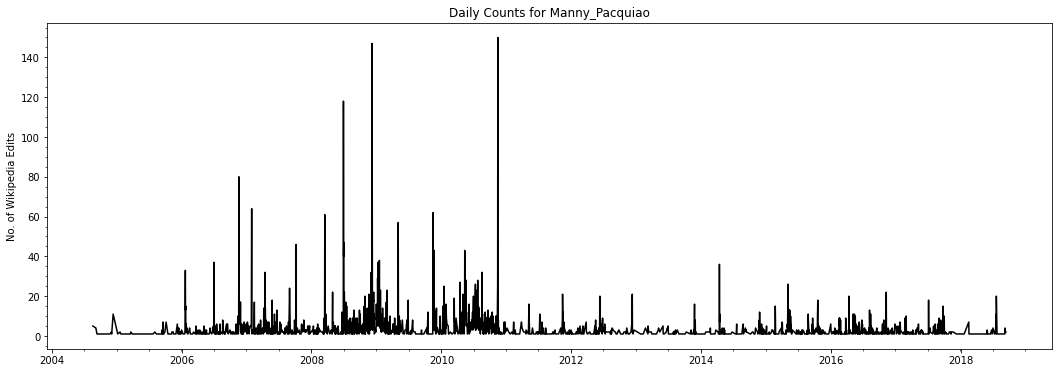

In [23]:
plt.figure(figsize=(18, 6))
plt.plot(x, y, color='black')
plt.ylabel('No. of Wikipedia Edits')
plt.title('Daily Counts for %s' % title)
plt.minorticks_on()

### Compare timeseries charts for Manny Pacquiao and Floyd Mayweather

Filter dataframe by title and save with labels "MP" and "FM"

In [24]:
df_MP = df[df['title'] == 'Manny_Pacquiao']
df_FM = df[df['title'] == 'Floyd_Mayweather_Jr.']

Get daily counts for both

In [26]:
df_daily_MP = df_MP.groupby('date')['revid'].agg([len])
df_daily_FM = df_FM.groupby('date')['revid'].agg([len])

Define x and y variables for both

In [28]:
x_MP = df_daily_MP.index
x_FM = df_daily_FM.index

In [30]:
y_MP = df_daily_MP['len']
y_FM = df_daily_FM['len']

Plot timeseries charts

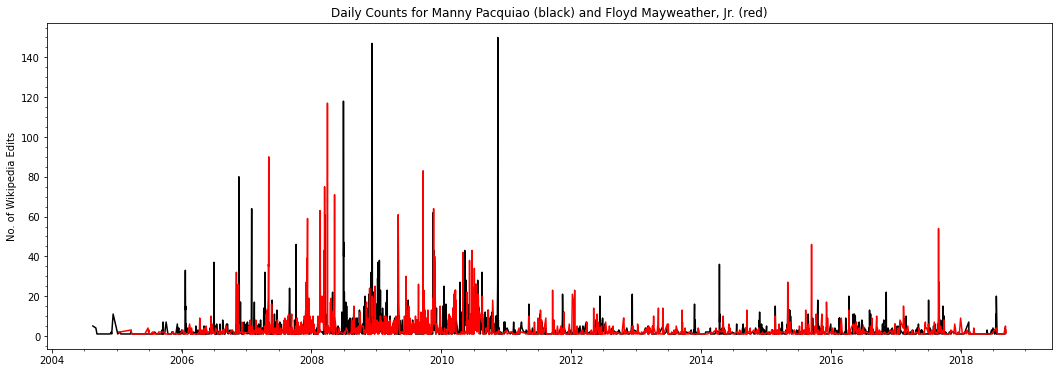

In [31]:
plt.figure(figsize=(18, 6))
plt.plot(x_MP, y_MP, color='black') # black line
plt.plot(x_FM, y_FM, color='red') # red line
plt.ylabel('No. of Wikipedia Edits')
plt.title('Daily Counts for Manny Pacquiao (black) and Floyd Mayweather, Jr. (red)')
plt.minorticks_on()

Zoom into year 2015

In [32]:
date_start = pd.to_datetime('2015/01/01')
date_end = pd.to_datetime('2015/12/31')

(735599.0, 735963.0)

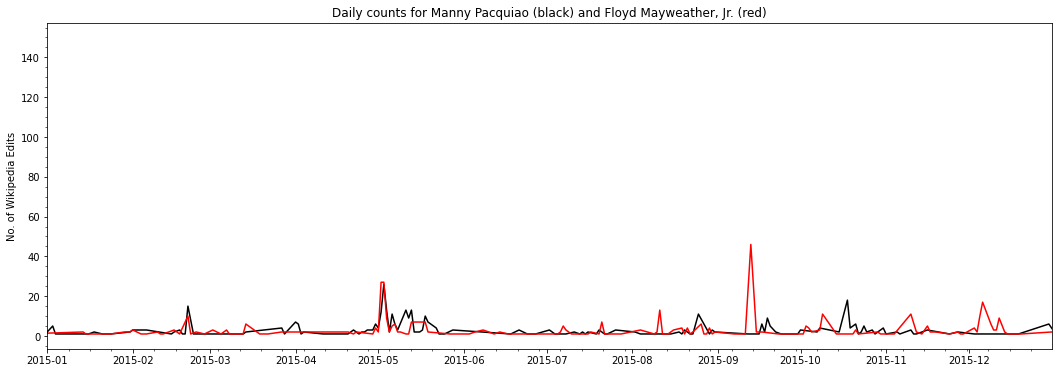

In [34]:
plt.figure(figsize=(18, 6))
plt.plot(x_MP, y_MP, 'k-')
plt.plot(x_FM, y_FM, 'r-')
plt.ylabel('No. of Wikipedia Edits')
plt.title('Daily counts for Manny Pacquiao (black) and Floyd Mayweather, Jr. (red)')
plt.minorticks_on()
plt.xlim((date_start, date_end))

Adjust y-axis limits

(0.0, 55.0)

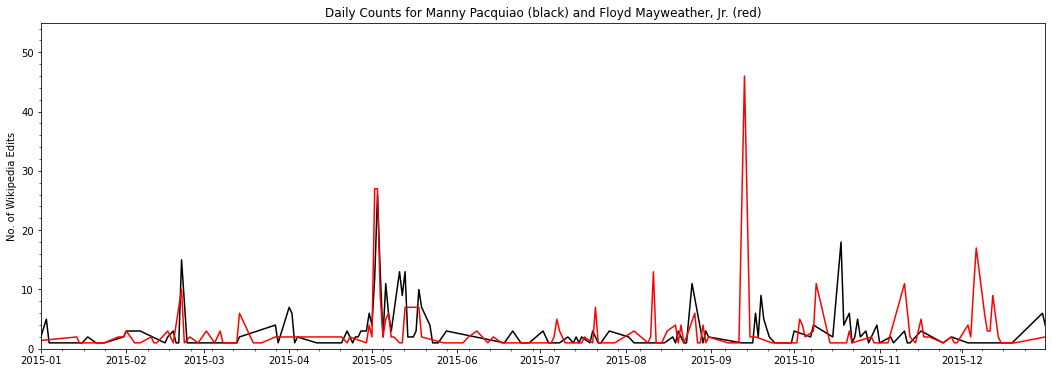

In [38]:
plt.figure(figsize=(18, 6))
plt.plot(x_MP, y_MP, 'k-')
plt.plot(x_FM, y_FM, 'r-')
plt.ylabel('No. of Wikipedia Edits')
plt.title('Daily Counts for Manny Pacquiao (black) and Floyd Mayweather, Jr. (red)')
plt.minorticks_on()
plt.xlim((date_start, date_end))
plt.ylim((0, 55)) # manually adjust y-axis limits to minimize whitespace

Annotate date of "Fight of the Century", May 2, 2015

Date reference date

In [39]:
date_ref = pd.to_datetime('2015/05/02')

Define annotation label

In [40]:
label_ref = 'The Fight of the Century'

Define x-axis position - convert date to numerical equivalent in matplotlin

In [41]:
date_num_ref = matplotlib.dates.date2num(date_ref)

Add vertical line to show reference date and add label next to it


Save to PNG File

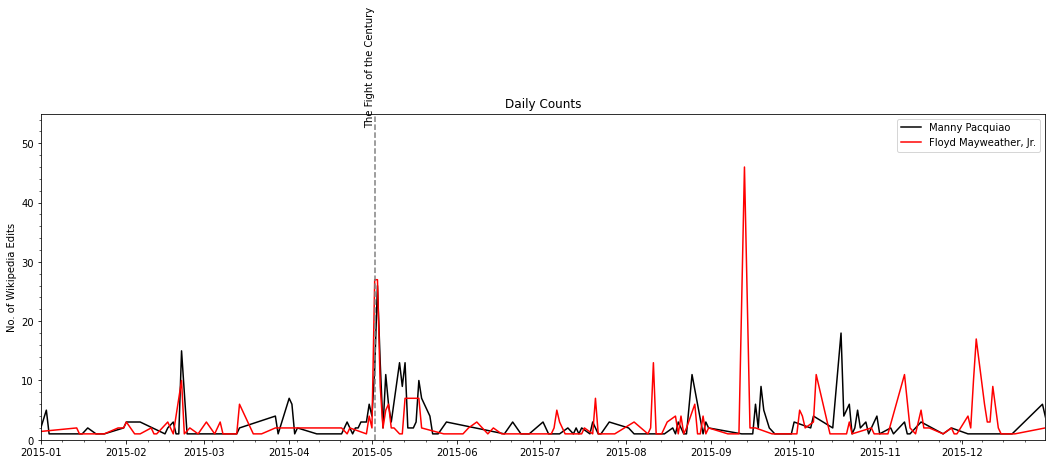

In [43]:
plt.figure(figsize=(18, 6))
plt.plot(x_MP, y_MP, 'k-', label='Manny Pacquiao')
plt.plot(x_FM, y_FM, 'r-', label='Floyd Mayweather, Jr.')
plt.ylabel('No. of Wikipedia Edits')
plt.title('Daily Counts')
plt.minorticks_on()
plt.xlim((date_start, date_end))
plt.ylim((0, 55))
plt.legend()
plt.axvline(date_ref, color='gray', ls='--') ## add vertical line
plt.text(date_num_ref, 53, label_ref, rotation=90, horizontalalignment='right') # add text label
plt.savefig('fig/figtimeseries_Pacquiao_Mayweather.png', dpi=200, bbox_inches='tight')
